# Submission Analisis Data menggunakan Bike Sharing Dataset
- **Nama:Yohanes Deny Novandian**
- **Email:yohandeny.10@gmail.com**
- **Username Dicoding: yohanes_deny_novandi**

#Preparation : menyiapkan pertanyaan bisnis
-Bagaimana tren penyewaan sepeda per hari ?

-Apa korelasi antara kondisi cuaca (seperti temp, atemp, hum, windspeed, casual, dan registered) dan jumlah rata-rata penyewaan sepeda per hari?


-Pada musim apa penyewaan sepeda mendapatkan rata-rata harian tertinggi dalam setahun?

-Pada bulan apa penyewaan sepeda mendapatkan rata-rata harian tertinggi dalam setahun?

-Pada cuaca apa penyewaan sepeda mendapatkan rata-rata harian tertinggi dalam setahun?

##Installer

In [1]:
# Import Library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns 

# 1) Pengumpulan Data <a class="anchor" id="h1"></a>

##Dataset

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view


Dataset yang dipakai adalah dataset dengan nama file "day.csv" dan "hour.csv"


Data Bike Sharing dataset day.csv berisikan 731 baris dengan 16 fitur/kolom dan dataset hour.csv berisikan 17379 baris dengan 17 fitur/kolom  


Penjelasan setiap fitur/kolomnya adalah sebagai berikut:

*hour: uritan perjamnya

1.instant: Nomor unik sebagai indeks.

2.dteday: Tanggal pencatatan data.

3.season: Musim dalam tahun dengan keterangan numerik dan nama musim.

4.yr: Tahun dengan nilai numerik yang menandakan tahun 2011 atau 2012.

5.mnth: Bulan dalam setahun dengan nilai numerik.

6.holiday: Indikator apakah hari tersebut merupakan hari libur atau tidak.

7.weekday: Hari dalam seminggu dengan nilai numerik yang mewakili urutan hari.

8.workingday: Indikator apakah hari tersebut merupakan hari kerja atau tidak.

9.weathersit: Kondisi cuaca dengan keterangan numerik dan deskripsi kondisi cuaca.

10.temp: Suhu dalam Celcius yang telah dinormalisasikan.

11.atemp: Suhu terasa seperti dalam Celcius yang telah dinormalisasikan.

12.hum: Kelembapan dalam persentase yang telah dinormalisasikan.

13.windspeed: Kecepatan angin dalam satuan yang telah dinormalisasikan.

14.casual: Jumlah pengguna tidak terdaftar.

15.registered: Jumlah pengguna terdaftar.

16.cnt: Jumlah total pengguna (terdaftar dan tidak terdaftar).


### Load Data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Menampung data tabel penyewaan sepeda perhari-nya
day_df = pd.read_csv('/dataset/day.csv')
# Menampilkan 5 data teratas
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Menampung data tabel penyewaan sepeda perjam-nya
hour_df = pd.read_csv('/dataset/hour.csv')
# Menampilkan 24 data teratas
hour_df.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


# 2) Menelaah Data <a class="anchor" id="h3"></a>

### Membaca Dataset


In [10]:
# Memerikasa Jumlah Baris dan kolom pada datset harian dan perjam
jumlah_baris, jumlah_kolom = day_df.shape
print(f"Jumlah Baris dataset Harian: {jumlah_baris}")
print(f"Jumlah Kolom dataset Harian: {jumlah_kolom}")

jumlah_baris, jumlah_kolom = hour_df.shape
print(f"Jumlah Baris dataset Perjamnya: {jumlah_baris}")
print(f"Jumlah Kolom dataset Perjamnya: {jumlah_kolom}")

Jumlah Baris dataset Harian: 731
Jumlah Kolom dataset Harian: 16
Jumlah Baris dataset Perjamnya: 17379
Jumlah Kolom dataset Perjamnya: 17


setelah membaca file dataset lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# 3) Validasi  Data <a class="anchor" id="h3"></a>

**Melakukan pengecekan terhadap kedua tabel terdapat data yang hilang**

In [13]:
# melakukan pengecekan data yang hilang terhadap dataset harian
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# melakukan pengecekan data yang hilang terhadap dataset perjamnya
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Melakukan pengecekan terhadap kedua tabel terdapat data duplicate atau adata yang sama**

In [15]:
print("jumlah data duplicate : ", day_df.duplicated().sum())
day_df.describe()

jumlah data duplicate :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
print("Jumlah data duplicate :", hour_df.duplicated().sum())
hour_df.describe()

Jumlah data duplicate : 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# 4)  Kontruksi Data

**Melakukan perubahan pada format tanggal sesuai dengan kolomnya**

In [17]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
hour_df["dteday"]= pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# 5) Explatory Data Analysis (EDA)

In [36]:
# menggabungkan 2 dataset harian dan perjamnya
bike_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 7) Visualisasi data

**1. Menampilkan grafik penyewaan sepeda per hari untuk jawaban pertanyaan bisnis pertama**

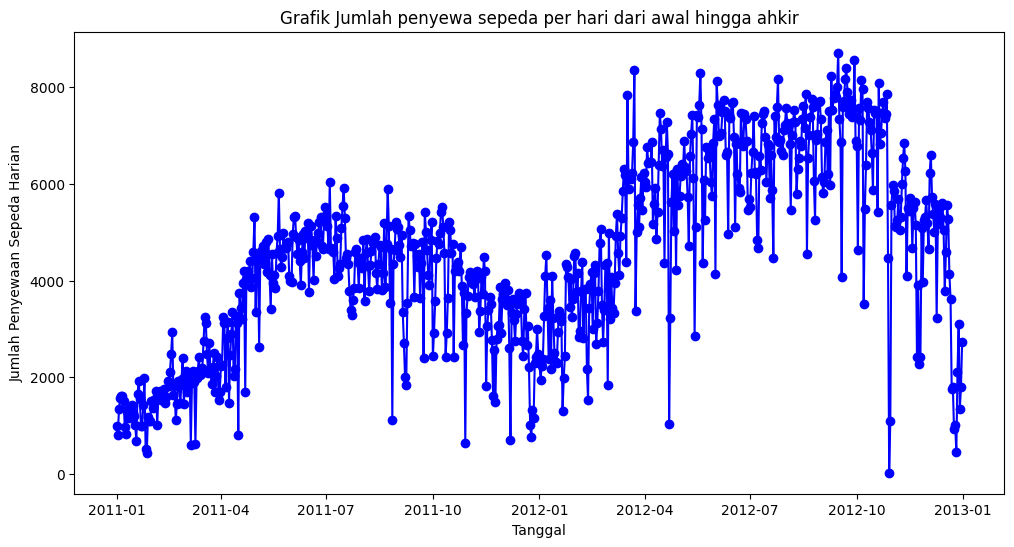

In [53]:
# Membuat time series plot  untuk melihat performa jumlah penyewa sepeda
plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'], marker='o', linestyle='-', color='blue')
plt.title('Grafik Jumlah penyewa sepeda per hari dari awal hingga ahkir')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda Harian')
plt.show()

**2. Menampilkan grafik corelasi temp, atemp, hum, windspeed, casual, dan registered terhadap jumlah (count) untuk jawaban pertanyaan bisnis kedua**

<Axes: >

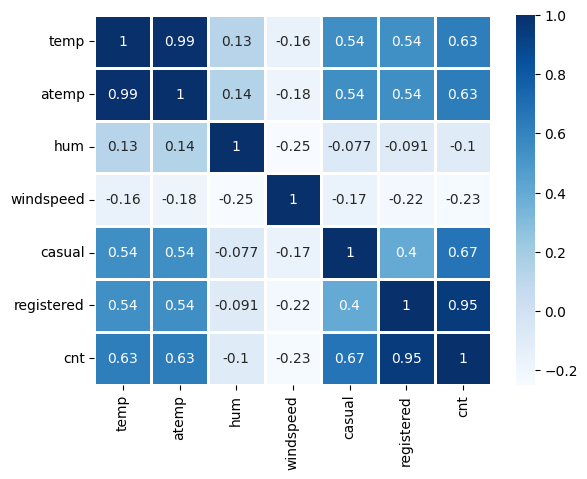

In [25]:
day_new = day_df[['temp','atemp','hum','windspeed','casual', 'registered','cnt']]
sns.heatmap(day_new.corr(), annot=True, cmap='Blues', linewidths=1)

##merubah isi kolom dengan value yang real seperti bulan dan musimn

In [37]:
bike_df.mnth_day.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [38]:
bike_df.season_day.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

In [39]:
weather_labels = {
    1: 'Cerah',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}

bike_df['weather_label'] = bike_df['weathersit_day'].map(weather_labels)

In [43]:
bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,weather_label,cnt_day
1,Curah Hujan Lebat,74.333333
2,Curah Hujan Ringan,111.579281
3,Kabut,175.165493
0,Cerah,204.869272


**3. Menampilkan grafik penyewaan sepeda berdasarkan muasim untuk jawaban pertanyaan bisnis ketiga**

<ipython-input-58-6d9de4cda562>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


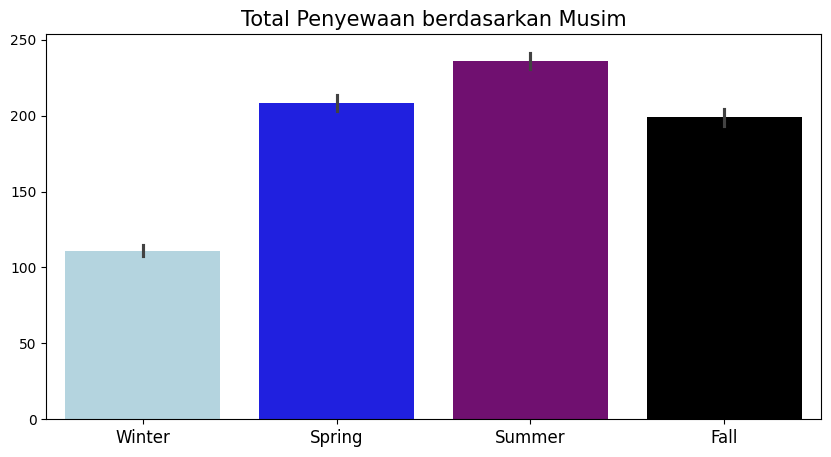

In [58]:
plt.figure(figsize=(10, 5))
colors_ = ["lightblue", "blue", "purple", "black"]
sns.barplot(
    y="cnt_day",
    x="season_day",
    data=bike_df,
    palette=colors_
)
plt.title("Total Penyewaan berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**4. Menampilkan grafik penyewaan sepeda berdasarkan bulan untuk jawaban pertanyaan bisnis keempat**

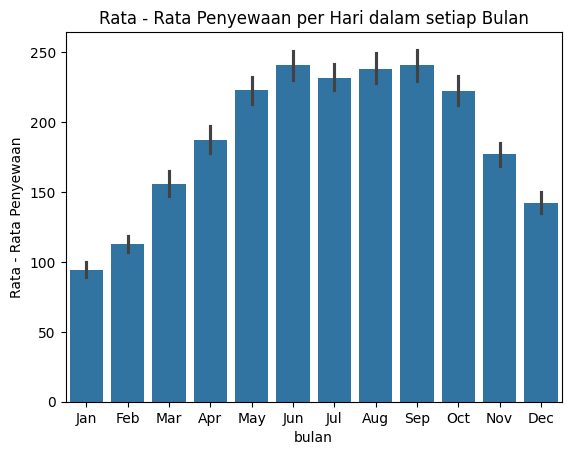

In [45]:
sns.barplot(x='mnth_day', y='cnt_day', data=bike_df)

plt.title('Rata - Rata Penyewaan per Hari dalam setiap Bulan')
plt.xlabel('bulan')
plt.ylabel('Rata - Rata Penyewaan')

plt.show()

**5. Menampilkan grafik penyewaan sepeda berdasarkan cuaca untuk jawaban pertanyaan bisnis keempat**

<ipython-input-57-adf515eec121>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


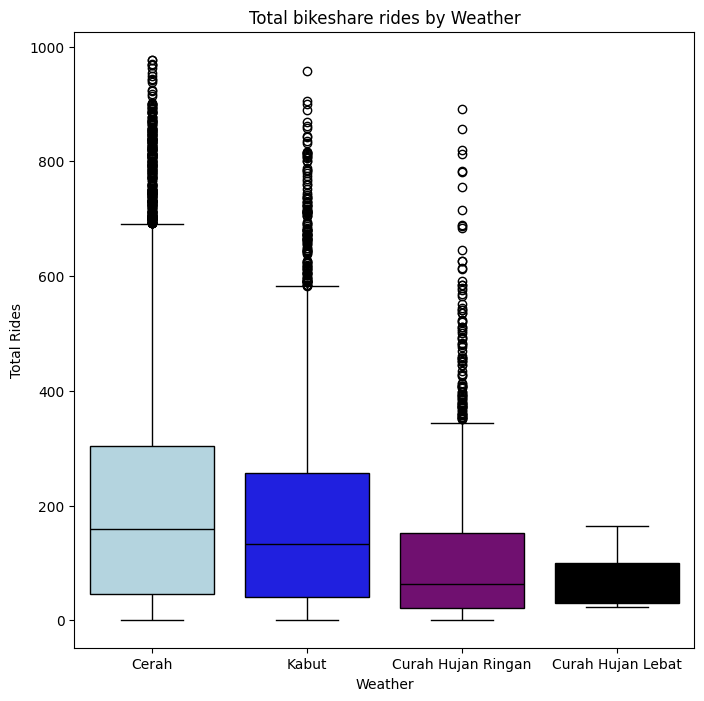

In [57]:
avg_weather = bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")
plt.figure(figsize=(8,8))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="weather_label",
    y="cnt_day",
    data=bike_df,
    palette=["lightblue", "blue", "purple", "black"]
)

# Add labels and a title to the plot
plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Weather")

# Show the plot
plt.show()


# 8) Conclusion

-Bagaimana tren penyewaan sepeda per hari ?

-Apa korelasi antara kondisi cuaca (seperti temp, atemp, hum, windspeed, casual, dan registered)?


-Pada musim apa penyewaan sepeda mendapatkan rata-rata harian tertinggi dalam setahun?

-Pada bulan apa penyewaan sepeda mendapatkan rata-rata harian tertinggi dalam setahun?

-Pada cuaca apa penyewaan sepeda mendapatkan rata-rata harian tertinggi dalam setahun?

**Conclution pertanyaan**

- **1**: dalam kurun waktu januari sampai desember di thaun 2011 terjadi ketidakstabilan hingga meraih tertinggi pada bulan juli. Namun di januari 2012 hingga oktober terjadi lonjakan yang stabil naik signifikan hingga tertinggi di 8000, namun terjadi penurunan hingga awal januari tahun 2013

- **2**: Menampilkan korleasi dimana tiap fitur atau kolom memmpengaruhi nilai count

- **3**: Penyewaan sepeda cenderung mencapai puncaknya selama musim panas

- **4** :Rata-rata harian penyewaan sepeda paling tinggi terjadi pada bulan Juni dan September.

- **5** : Permintaan penyewaan sepeda cenderung tinggi saat cuaca cerah, sementara rendah saat cuaca hujan lebat.

In [52]:
bike_df.to_csv("bike_streamlit_dataset.csv", index=False)